# K-Means Data Ekspor NonMigas DKI Jakarta Bulan Januari 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data-ekspor-nonmigas-menurut-kelompok-barang-di-provinsi-dki-jakarta-januari-tahun-2016.csv')
data

,tahun,bulan,kelompok_barang,nilai_barang,volume_barang,keterangan
0,2016,1,"Binatang Hidup, Produk Hewani",65606.0,19934.0,Data Sangat Sementara
1,2016,1,Produk Nabati,12059.0,7748.0,Data Sangat Sementara
2,2016,1,"Lemak, Minyak dan Malam",15679.0,21346.0,Data Sangat Sementara
3,2016,1,"Makanan, Minuman, Minuman Keras, dan Tembakau",26591.0,28005.0,Data Sangat Sementara
4,2016,1,Produk Mineral,120.0,612.0,Data Sangat Sementara
5,2016,1,Produk Industri Kimia dan Industri Sejenis,61007.0,41113.0,Data Sangat Sementara
6,2016,1,"Plastik, Karet, dan Barang dari Plastik dan Karet",18822.0,13165.0,Data Sangat Sementara
7,2016,1,Kulit dan Barang dari Kulit,2856.0,107.0,Data Sangat Sementara
8,2016,1,"Kayu, Barang dari Kayu, dan Barang Anyaman",3980.0,4504.0,Data Sangat Sementara
9,2016,1,"Pulp, Kertas, dan Barang dari Kertas",2124.0,2076.0,Data Sangat Sementara


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
tahun              21 non-null int64
bulan              21 non-null int64
kelompok_barang    21 non-null object
nilai_barang       20 non-null float64
volume_barang      20 non-null float64
keterangan         21 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ KB


### Slice Kolom yang Variabelnya Dibutuhkan

In [4]:
data_slice = data[['kelompok_barang','nilai_barang','volume_barang']]
data_slice.dropna()

,kelompok_barang,nilai_barang,volume_barang
0,"Binatang Hidup, Produk Hewani",65606.0,19934.0
1,Produk Nabati,12059.0,7748.0
2,"Lemak, Minyak dan Malam",15679.0,21346.0
3,"Makanan, Minuman, Minuman Keras, dan Tembakau",26591.0,28005.0
4,Produk Mineral,120.0,612.0
5,Produk Industri Kimia dan Industri Sejenis,61007.0,41113.0
6,"Plastik, Karet, dan Barang dari Plastik dan Karet",18822.0,13165.0
7,Kulit dan Barang dari Kulit,2856.0,107.0
8,"Kayu, Barang dari Kayu, dan Barang Anyaman",3980.0,4504.0
9,"Pulp, Kertas, dan Barang dari Kertas",2124.0,2076.0


### Menentukan Variabel yang Dibutuhkan Dalam Melakukan Klustering

In [5]:
data_array = data.loc[:,("nilai_barang","volume_barang")]
d_array = data_array.dropna()
d_array

,nilai_barang,volume_barang
0,65606.0,19934.0
1,12059.0,7748.0
2,15679.0,21346.0
3,26591.0,28005.0
4,120.0,612.0
5,61007.0,41113.0
6,18822.0,13165.0
7,2856.0,107.0
8,3980.0,4504.0
9,2124.0,2076.0


### Menampilkan Persebaran Data pada Variabel "nilai_barang" dan "volume_barang"

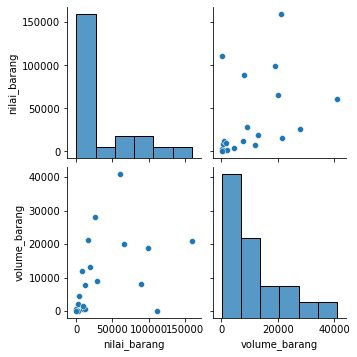

In [6]:
sns.pairplot(data_slice[['nilai_barang','volume_barang']])

### Mengubah DataFrame ke Dalam Array

In [7]:
x_array = np.array(d_array)
print(x_array)

[[6.56060e+04 1.99340e+04]
 [1.20590e+04 7.74800e+03]
 [1.56790e+04 2.13460e+04]
 [2.65910e+04 2.80050e+04]
 [1.20000e+02 6.12000e+02]
 [6.10070e+04 4.11130e+04]
 [1.88220e+04 1.31650e+04]
 [2.85600e+03 1.07000e+02]
 [3.98000e+03 4.50400e+03]
 [2.12400e+03 2.07600e+03]
 [8.89410e+04 7.97200e+03]
 [8.93500e+03 6.66000e+02]
 [7.65100e+03 1.19690e+04]
 [1.11075e+05 2.10000e+01]
 [2.80210e+04 9.12400e+03]
 [9.91710e+04 1.88760e+04]
 [1.59739e+05 2.10650e+04]
 [1.20470e+04 7.52000e+02]
 [1.00430e+04 1.64200e+03]
 [1.63000e+02 3.10000e+01]]


In [8]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(d_array)
x_scaled

array([[4.10264442e-01, 4.84595542e-01],
       [7.47968600e-02, 1.88041468e-01],
       [9.74758644e-02, 5.18957461e-01],
       [1.65838653e-01, 6.81008469e-01],
       [0.00000000e+00, 1.43823615e-02],
       [3.81452083e-01, 1.00000000e+00],
       [1.17166503e-01, 3.19867614e-01],
       [1.71408166e-02, 2.09286479e-03],
       [2.41825848e-02, 1.09096661e-01],
       [1.25548963e-02, 5.00097343e-02],
       [5.56456312e-01, 1.93492651e-01],
       [5.52252551e-02, 1.56964859e-02],
       [4.71811000e-02, 2.90762192e-01],
       [6.95124014e-01, 0.00000000e+00],
       [1.74797487e-01, 2.21527305e-01],
       [6.20546426e-01, 4.58848438e-01],
       [1.00000000e+00, 5.12119147e-01],
       [7.47216810e-02, 1.77893507e-02],
       [6.21667847e-02, 3.94480678e-02],
       [2.69391488e-04, 2.43356371e-04]])

### Mengambil dan Mengkonfigurasi 5 Kluster untuk perhitungan KMeans

In [9]:
kmeans = KMeans(n_clusters = 5,random_state = 123)
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)

[[0.81027321 0.48548379]
 [0.04936699 0.0862809 ]
 [0.19768637 0.50110727]
 [0.62579016 0.09674633]
 [0.38145208 1.        ]]


###### Berikut Hasil Dari Kluster

In [10]:
print(kmeans.labels_)

[2 1 2 2 1 4 2 1 1 1 3 1 1 3 1 0 0 1 1 1]


### Menambahkan Hasil Kluster keDalam DataFrame d_array

In [14]:
d_array.loc[:,"kluster"] = kmeans.labels_
d_array

,nilai_barang,volume_barang,kluster
0,65606.0,19934.0,2
1,12059.0,7748.0,1
2,15679.0,21346.0,2
3,26591.0,28005.0,2
4,120.0,612.0,1
5,61007.0,41113.0,4
6,18822.0,13165.0,2
7,2856.0,107.0,1
8,3980.0,4504.0,1
9,2124.0,2076.0,1


### Memvisualkan Hasil Kluster

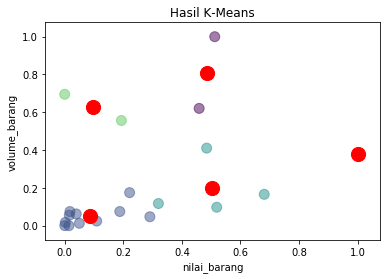

In [12]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 100,
c = d_array.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='red', s=200, alpha=1);plt.title("Hasil K-Means")
plt.xlabel("nilai_barang")
plt.ylabel("volume_barang")
plt.show()